## Ejemplo de series de tiempo ARIMA

In [8]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Carga del fichero de datos y parseo de fecha
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('data/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


A continuación se divide el dataset en train y test

In [ ]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

Se realiza la predicción del conjunto de test

In [9]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=349.117741, expected=342.300000
predicted=306.512932, expected=339.700000
predicted=387.376385, expected=440.400000
predicted=348.154183, expected=315.900000
predicted=386.308800, expected=439.300000
predicted=356.082060, expected=401.300000
predicted=446.379472, expected=437.400000
predicted=394.737283, expected=575.500000
predicted=434.915570, expected=407.600000
predicted=507.923351, expected=682.000000
predicted=435.483094, expected=475.300000
predicted=652.743765, expected=581.300000
predicted=546.343466, expected=646.900000
Test MSE: 6958.327


Se muestran los resultados predichos y los verdaderos resultados (test)

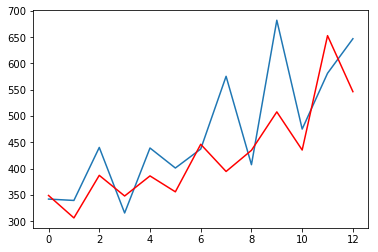

In [11]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()